<a href="https://colab.research.google.com/github/ShunichiKanda/SpamMail-Classification/blob/master/spam_mail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
from google.colab import drive
drive.mount('/content/drive')
%cd "drive/My Drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/My Drive


In [165]:
import re
import string

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from bs4 import BeautifulSoup
from imblearn.under_sampling import RandomUnderSampler
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import STOPWORDS, WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
import math
import statistics
from imblearn.over_sampling import SMOTE

In [166]:
df = pd.read_csv("spam_train_data.csv")
test = pd.read_csv("spam_test_data.csv")

In [167]:
df

,id,contents,y
0,1,Subject: re : fw : willis phillips\r\ni just s...,0
1,2,Subject: re : factor loadings for primary curv...,0
2,3,Subject: re : meridian phone for kate symes\r\...,0
3,4,"Subject: re : october wellhead\r\nvance ,\r\nd...",0
4,5,Subject: california 6 / 13\r\nexecutive summar...,0
...,...,...,...
8873,8874,Subject: uk rpi model\r\nhi zimin !\r\nplease ...,0
8874,8875,Subject: new sitara desk request\r\nthis needs...,0
8875,8876,Subject: enterprise risk management\r\ndear vi...,0
8876,8877,Subject: re : the spreadsheet for talon deal\r...,0


In [168]:
''' print('contentsが重複:', len(df[df.duplicated(subset=["contents"])]))
print('contentsとyがどちらも重複:', len(df[df.duplicated(subset=["contents", "y"])]))
df[df.duplicated(subset=["contents", "y"])] '''

' print(\'contentsが重複:\', len(df[df.duplicated(subset=["contents"])]))\nprint(\'contentsとyがどちらも重複:\', len(df[df.duplicated(subset=["contents", "y"])]))\ndf[df.duplicated(subset=["contents", "y"])] '

In [169]:
''' df.drop_duplicates(['contents', 'y'], inplace=True) '''

" df.drop_duplicates(['contents', 'y'], inplace=True) "

In [170]:
df

,id,contents,y
0,1,Subject: re : fw : willis phillips\r\ni just s...,0
1,2,Subject: re : factor loadings for primary curv...,0
2,3,Subject: re : meridian phone for kate symes\r\...,0
3,4,"Subject: re : october wellhead\r\nvance ,\r\nd...",0
4,5,Subject: california 6 / 13\r\nexecutive summar...,0
...,...,...,...
8873,8874,Subject: uk rpi model\r\nhi zimin !\r\nplease ...,0
8874,8875,Subject: new sitara desk request\r\nthis needs...,0
8875,8876,Subject: enterprise risk management\r\ndear vi...,0
8876,8877,Subject: re : the spreadsheet for talon deal\r...,0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8878 entries, 0 to 8877
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        8878 non-null   int64 
 1   contents  8878 non-null   object
 2   y         8878 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 208.2+ KB


In [172]:
for i in df.iterrows():
    print("Class Label: {}\nMail: \n{}\n\n".format(i[1][2], i[1][1]))
    if i[0] == 6: break

Class Label: 0
Mail: 
Subject: re : fw : willis phillips
i just spoke to lavo and he said the same thing . we are planning on offering willis an associate position in east power . i propose we offer 75 k salary with 25 k sign - on . we would require a 90 day evergreen non - compete and payback of 25 k retention in the event he left within the the lst year .
kim - can you please prepare the offer package based on the above .
thanks .


Class Label: 0
Mail: 
Subject: re : factor loadings for primary curves
tanya ,
i went through the comparisons for the liquids curves and the
appearance of clear parallel shifts , etc , do begin to emerge when fewer
forward prices are used . it looks sensible . i have passed the graphs over
to the liquids people , and i have asked them to identify rough term structure
months when illiquidity begins for these curves . it might coincide with your
assumptions . i am surprised by brent and dubai , which should be wti - clones .
naveen
tanya tamarchenko @ ect
1

In [173]:
df[["contents", "y"]].describe()

,y
count,8878.000000
mean,0.019261
std,0.137449
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [174]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [175]:
stop = set(stopwords.words("english"))

# string.punctuation = ['!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']
punctuation = list(string.punctuation)

# 手動で追加
org_stop = ["Subject"]

# stopwordsの定義更新
add_stop = punctuation + org_stop
stop.update(add_stop)

In [176]:
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'Subject',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'mys

In [177]:
# htmlの分割
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# []で囲まれた文章の削除（脚注、linkなど）
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# URLの削除
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

# stopwordsの削除
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            if i.strip().isalpha():
                final_text.append(i.strip())
    return " ".join(final_text)


# ↑の関数をまとめて適用する関数
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# ↑の関数の適用
df['contents']=df['contents'].apply(denoise_text)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


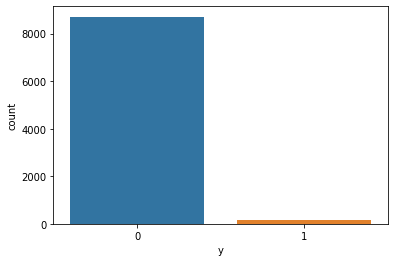

In [178]:
sns.countplot(df["y"])

In [179]:
''' # 非spam
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df.y == 0].contents))
plt.imshow(wc, interpolation="bilinear") '''

' # 非spam\nplt.figure(figsize=(20,20))\nwc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df.y == 0].contents))\nplt.imshow(wc, interpolation="bilinear") '

In [180]:
''' # spam
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df.y == 1].contents))
plt.imshow(wc, interpolation="bilinear") '''

' # spam\nplt.figure(figsize=(20,20))\nwc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = STOPWORDS).generate(" ".join(df[df.y == 1].contents))\nplt.imshow(wc, interpolation="bilinear") '

In [181]:
df["length"] = df["contents"].apply(len)
df.head()

,id,contents,y,length
0,1,fw willis phillips spoke lavo said thing plann...,0,258
1,2,factor loadings primary curves tanya went comp...,0,1007
2,3,meridian phone kate symes bill done mid aftern...,0,254
3,4,october wellhead vance deal created entered si...,0,365
4,5,california executive summary cpuc rules socal ...,0,2130


In [182]:
''' fig,ax = plt.subplots(1,2,figsize=(12,4))

df[df["y"]==0].hist(column="length", bins=2500, ax=ax[0], color = "green")
ax[0].set(xlabel = "Length Class", ylabel = "Frequency", title = "not spam")
ax[0].set_xlim([0,12000])

df[df["y"]==1].hist(column="length", bins=50, ax=ax[1], color = "red")
ax[1].set(xlabel = "Length Class", ylabel = "Frequency", title = "spam")

plt.show() '''

' fig,ax = plt.subplots(1,2,figsize=(12,4))\n\ndf[df["y"]==0].hist(column="length", bins=2500, ax=ax[0], color = "green")\nax[0].set(xlabel = "Length Class", ylabel = "Frequency", title = "not spam")\nax[0].set_xlim([0,12000])\n\ndf[df["y"]==1].hist(column="length", bins=50, ax=ax[1], color = "red")\nax[1].set(xlabel = "Length Class", ylabel = "Frequency", title = "spam")\n\nplt.show() '

In [183]:
# 文章の長さの差を数値でも確認
df.groupby("y")["length"].mean()

y
0    1075.788331
1     811.578947
Name: length, dtype: float64

In [184]:
df["words"] = df["contents"].str.split().map(lambda x: len(x))
df.head()

,id,contents,y,length,words
0,1,fw willis phillips spoke lavo said thing plann...,0,258,41
1,2,factor loadings primary curves tanya went comp...,0,1007,153
2,3,meridian phone kate symes bill done mid aftern...,0,254,39
3,4,october wellhead vance deal created entered si...,0,365,58
4,5,california executive summary cpuc rules socal ...,0,2130,286


In [185]:
''' fig,ax = plt.subplots(1,2,figsize=(12,4))

df[df["y"]==0].hist(column="words", bins=2500, ax=ax[0], color = "green")
ax[0].set(xlabel = "words Class", ylabel = "Frequency", title = "not spam")
ax[0].set_xlim([0,1200])

df[df["y"]==1].hist(column="words", bins=50, ax=ax[1], color = "red")
ax[1].set(xlabel = "words Class", ylabel = "Frequency", title = "spam")

plt.show() '''

' fig,ax = plt.subplots(1,2,figsize=(12,4))\n\ndf[df["y"]==0].hist(column="words", bins=2500, ax=ax[0], color = "green")\nax[0].set(xlabel = "words Class", ylabel = "Frequency", title = "not spam")\nax[0].set_xlim([0,1200])\n\ndf[df["y"]==1].hist(column="words", bins=50, ax=ax[1], color = "red")\nax[1].set(xlabel = "words Class", ylabel = "Frequency", title = "spam")\n\nplt.show() '

In [186]:
# 単語の多さの差を数値でも確認
df.groupby("y")["words"].mean()

y
0    153.408407
1    113.181287
Name: words, dtype: float64

In [187]:
# trainデータを分割
X = pd.DataFrame(df['contents'])
y = pd.DataFrame(df['y'])

In [189]:
seed = [i for i in range(100)]
preds = []
num = int(len(y[y['y'] == 1])/1.2)
# 0.46105882
strategy = {0:round(num*0.46105882), 1:num}

for i in seed:
    # アンダーサンプリングしながら訓練用データの作成
    sampler = RandomUnderSampler(random_state=i, sampling_strategy = strategy)
    X_resampled, y_resampled = sampler.fit_resample(X,y)

    # 検証用データの作成（random_stateを変えて取得）
    sampler = RandomUnderSampler(random_state=i+10, sampling_strategy = strategy)
    X_val, y_val = sampler.fit_resample(X,y)
    
    # 単語の出現回数取得
    vec_count = CountVectorizer(min_df=3)
    X_resampled = pd.DataFrame(X_resampled)
    vec_count.fit(X_resampled[0])

    # 単語の種類の表示
    print('word size: ', len(vec_count.vocabulary_))
    # 先頭５件の単語を表示
    print('word content: ', dict(list(vec_count.vocabulary_.items())[0:5]))
    
    # 訓練データと検証データをベクトル化
    X_resampled_vec = vec_count.transform(X_resampled[0])
    X_val = pd.DataFrame(X_val)
    X_val_vec = vec_count.transform(X_val[0])

    # sm = SMOTE(random_state=42)
    # X_resampled_vec, y_resampled = sm.fit_sample(X_resampled_vec, y_resampled)
    
    # ベルヌーイモデルで学習
    model = MultinomialNB(alpha = 1.0)
    y_resampled = pd.DataFrame(y_resampled)
    model.fit(X_resampled_vec, y_resampled[0])

    # F1スコアのprint
    print("val_F1-score",f1_score(model.predict(X_val_vec),y_val))
    print("------------------------------------------------------------------------------------------------------------------")
    
    # testデータをベクトル化
    df_data = pd.DataFrame(test, columns=['contents'])
    input_vec = vec_count.transform(df_data['contents'])

    # testの予測→seed毎に空のリストに格納
    pred = model.predict(input_vec)
    preds.append(pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1540
word content:  {'request': 1149, 'access': 6, 'enron': 420, 'com': 222, 'received': 1118}
val_F1-score 0.975609756097561
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1413
word content:  {'meeting': 758, 'vince': 1348, 'went': 1370, 'boring': 147, 'members': 761}
val_F1-score 0.975609756097561
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1890
word content:  {'planning': 1237, 'energy': 534, 'finance': 636, 'class': 294, 'presentation': 1278}
val_F1-score 0.9333333333333333
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1402
word content:  {'start': 1182, 'date': 293, 'hourahead': 545, 'hour': 544, 'ancillary': 66}
val_F1-score 0.9788732394366197
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1361
word content:  {'fw': 473, 'tax': 1204, 'reserve': 1020, 'transaction': 1248, 'attached': 90}
val_F1-score 0.979020979020979
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1680
word content:  {'open': 1013, 'season': 1327, 'package': 1039, 'expansion': 506, 'firm': 555}
val_F1-score 0.9690721649484537
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1312
word content:  {'possible': 871, 'would': 1299, 'like': 606, 'another': 58, 'stay': 1123}
val_F1-score 0.9722222222222222
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1419
word content:  {'people': 918, 'say': 1116, 'would': 1404, 'delete': 315, 'prior': 974}
val_F1-score 0.9757785467128027
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1626
word content:  {'london': 806, 'fyi': 585, 'mentioned': 879, 'four': 571, 'next': 943}
val_F1-score 0.9722222222222222
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1408
word content:  {'sap': 1098, 'training': 1289, 'statistics': 1210, 'good': 515, 'turn': 1302}
val_F1-score 0.9690721649484537
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1473
word content:  {'flow': 475, 'volumes': 1408, 'meter': 783, 'sitara': 1212, 'bob': 150}
val_F1-score 0.9624573378839592
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1347
word content:  {'also': 58, 'research': 1011, 'responsible': 1017, 'lot': 662, 'modeling': 735}
val_F1-score 0.9754385964912281
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1326
word content:  {'nomination': 760, 'effective': 338, 'december': 283, 'mmbtu': 716, 'transaction': 1211}
val_F1-score 0.9621993127147765
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1362
word content:  {'ena': 352, 'louise': 677, 'need': 773, 'bring': 147, 'close': 199}
val_F1-score 0.9494949494949495
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1384
word content:  {'weekly': 1335, 'report': 1029, 'delivery': 310, 'monday': 751, 'please': 910}
val_F1-score 0.9757785467128027
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1375
word content:  {'position': 934, 'manager': 728, 'transmission': 1264, 'schedule': 1085, 'system': 1204}
val_F1-score 0.9791666666666666
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1300
word content:  {'operating': 771, 'standards': 1088, 'draft': 313, 'think': 1164, 'good': 459}
val_F1-score 0.9860139860139859
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1641
word content:  {'meter': 915, 'new': 971, 'march': 880, 'confirmation': 284, 'cut': 340}
val_F1-score 0.9559322033898304
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1462
word content:  {'louise': 741, 'federal': 473, 'competition': 244, 'commission': 233, 'told': 1332}
val_F1-score 0.9621993127147765
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1425
word content:  {'louise': 697, 'spoke': 1206, 'talking': 1258, 'afternoon': 36, 'book': 153}
val_F1-score 0.9754385964912281
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1471
word content:  {'analysis': 61, 'update': 1377, 'us': 1381, 'economic': 382, 'impact': 611}
val_F1-score 0.9580419580419581
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1655
word content:  {'enron': 448, 'table': 1459, 'magazine': 831, 'new': 945, 'times': 1507}
val_F1-score 0.9621993127147765
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1403
word content:  {'hpl': 557, 'hey': 539, 'help': 533, 'us': 1313, 'one': 830}
val_F1-score 0.979020979020979
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1370
word content:  {'party': 853, 'agreement': 43, 'attached': 98, 'response': 1035, 'need': 776}
val_F1-score 0.9726027397260273
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1313
word content:  {'schedule': 1029, 'hourahead': 528, 'failure': 419, 'start': 1109, 'date': 289}
val_F1-score 0.9657534246575342
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1613
word content:  {'fw': 578, 'power': 1084, 'points': 1064, 'better': 156, 'luck': 811}
val_F1-score 0.9619377162629758
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1294
word content:  {'hpl': 517, 'nom': 755, 'september': 1040, 'see': 1027, 'attached': 94}
val_F1-score 0.9787234042553192
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  2185
word content:  {'questions': 1564, 'hope': 904, 'gets': 822, 'mark': 1160, 'needs': 1260}
val_F1-score 0.9591836734693879
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1403
word content:  {'houston': 563, 'dear': 294, 'vince': 1342, 'thanks': 1261, 'coming': 206}
val_F1-score 0.9824561403508772
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1271
word content:  {'org': 773, 'today': 1152, 'meeting': 672, 'forwarded': 423, 'kevin': 569}
val_F1-score 0.979020979020979
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1576
word content:  {'information': 678, 'email': 433, 'current': 328, 'notes': 929, 'user': 1499}
val_F1-score 0.9690721649484537
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1555
word content:  {'desk': 357, 'deals': 342, 'cal': 184, 'deal': 341, 'entered': 440}
val_F1-score 0.9583333333333334
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1443
word content:  {'fw': 499, 'thing': 1301, 'last': 664, 'week': 1399, 'seems': 1152}
val_F1-score 0.9825783972125435
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1352
word content:  {'available': 106, 'firm': 446, 'capacity': 174, 'hi': 531, 'september': 1077}
val_F1-score 0.9894736842105264
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1420
word content:  {'san': 1102, 'two': 1320, 'fran': 496, 'employees': 384, 'would': 1404}
val_F1-score 0.9586206896551723
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1501
word content:  {'california': 171, 'update': 1406, 'ferc': 469, 'price': 1008, 'reported': 1119}
val_F1-score 0.9624573378839592
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1358
word content:  {'generic': 479, 'contract': 246, 'hi': 524, 'daren': 276, 'sorry': 1129}
val_F1-score 0.9627118644067797
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1444
word content:  {'enron': 396, 'technology': 1275, 'announcement': 70, 'way': 1395, 'groups': 534}
val_F1-score 0.9690721649484537
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1337
word content:  {'start': 1123, 'date': 271, 'hourahead': 519, 'hour': 518, 'ancillary': 64}
val_F1-score 0.9824561403508772
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1307
word content:  {'model': 696, 'received': 939, 'message': 679, 'please': 839, 'send': 1032}
val_F1-score 0.9859154929577465
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1649
word content:  {'site': 1366, 'seems': 1317, 'like': 804, 'link': 808, 'part': 1033}
val_F1-score 0.9556313993174063
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1476
word content:  {'grant': 540, 'thanks': 1322, 'hope': 581, 'good': 536, 'evening': 417}
val_F1-score 0.9655172413793103
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1505
word content:  {'call': 174, 'volume': 1445, 'enron': 416, 'response': 1138, 'extremely': 461}
val_F1-score 0.9690721649484537
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1370
word content:  {'credit': 260, 'com': 202, 'shirley': 1124, 'people': 874, 'houston': 553}
val_F1-score 0.9722222222222222
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1326
word content:  {'las': 587, 'vegas': 1262, 'sale': 1007, 'black': 127, 'done': 309}
val_F1-score 0.9722222222222222
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1529
word content:  {'competitive': 247, 'analysis': 64, 'update': 1442, 'us': 1446, 'attacks': 104}
val_F1-score 0.9754385964912281
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1371
word content:  {'enron': 367, 'sec': 1075, 'seeks': 1086, 'information': 571, 'recently': 995}
val_F1-score 0.9859154929577465
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1331
word content:  {'alumni': 57, 'list': 624, 'attached': 93, 'find': 423, 'system': 1160}
val_F1-score 0.9823321554770318
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1384
word content:  {'company': 220, 'usa': 1305, 'global': 493, 'sitara': 1143, 'response': 1045}
val_F1-score 0.972027972027972
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1477
word content:  {'enron': 411, 'keep': 666, 'good': 543, 'work': 1455, 'home': 579}
val_F1-score 0.9591836734693879
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1646
word content:  {'development': 393, 'progress': 1159, 'thank': 1478, 'process': 1146, 'december': 370}
val_F1-score 0.9619377162629758
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1454
word content:  {'thanks': 1302, 'message': 761, 'send': 1159, 'information': 598, 'regarding': 1064}
val_F1-score 0.9621993127147765
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1659
word content:  {'enron': 449, 'line': 794, 'tracking': 1516, 'meeting': 885, 'friday': 567}
val_F1-score 0.9657534246575342
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1553
word content:  {'agenda': 40, 'pre': 1039, 'work': 1531, 'valuation': 1478, 'session': 1254}
val_F1-score 0.9616724738675958
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1348
word content:  {'program': 941, 'hello': 522, 'next': 778, 'week': 1308, 'conference': 232}
val_F1-score 0.9722222222222222
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1446
word content:  {'post': 953, 'presentation': 963, 'enron': 377, 'field': 443, 'hi': 542}
val_F1-score 0.9688581314878894
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1915
word content:  {'global': 698, 'meter': 1035, 'july': 874, 'activity': 26, 'lee': 911}
val_F1-score 0.9591836734693879
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1378
word content:  {'production': 933, 'daren': 269, 'could': 251, 'would': 1367, 'mary': 694}
val_F1-score 0.9860139860139859
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1427
word content:  {'agenda': 41, 'california': 172, 'call': 173, 'proposal': 999, 'know': 654}
val_F1-score 0.9757785467128027
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1393
word content:  {'needed': 781, 'daren': 285, 'thank': 1240, 'prompt': 949, 'attention': 102}
val_F1-score 0.9652777777777778
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1306
word content:  {'please': 846, 'touch': 1187, 'base': 108, 'rac': 919, 'review': 980}
val_F1-score 0.9619377162629758
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1324
word content:  {'enron': 346, 'team': 1163, 'question': 928, 'hi': 515, 'need': 749}
val_F1-score 0.9686411149825783
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1317
word content:  {'problem': 899, 'shall': 1067, 'prepare': 880, 'short': 1078, 'presentation': 883}
val_F1-score 0.9754385964912281
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1531
word content:  {'global': 552, 'operations': 932, 'forum': 519, 'save': 1198, 'date': 321}
val_F1-score 0.9791666666666666
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1383
word content:  {'may': 714, 'activity': 15, 'thanks': 1235, 'daren': 275, 'need': 777}
val_F1-score 0.972027972027972
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1785
word content:  {'special': 1511, 'assets': 119, 'portfolio': 1190, 'april': 108, 'attached': 126}
val_F1-score 0.9688581314878894
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1509
word content:  {'list': 728, 'ena': 412, 'rac': 1086, 'employees': 409, 'family': 478}
val_F1-score 0.9824561403508772
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1418
word content:  {'follow': 456, 'email': 367, 'received': 1013, 'several': 1129, 'link': 658}
val_F1-score 0.972027972027972
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1489
word content:  {'letter': 700, 'louise': 745, 'attached': 99, 'please': 978, 'find': 482}
val_F1-score 0.9690721649484537
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1525
word content:  {'thank': 1369, 'mr': 863, 'received': 1111, 'first': 505, 'group': 573}
val_F1-score 0.9757785467128027
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1397
word content:  {'enrononline': 386, 'weekly': 1360, 'public': 1000, 'report': 1055, 'information': 602}
val_F1-score 0.9825783972125435
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1412
word content:  {'factor': 412, 'fyi': 473, 'jeff': 610, 'forwarded': 458, 'hou': 536}
val_F1-score 0.979020979020979
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1762
word content:  {'user': 1672, 'thanks': 1596, 'interest': 780, 'add': 29, 'meeting': 954}
val_F1-score 0.9391891891891893
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1492
word content:  {'enron': 424, 'technology': 1320, 'announcement': 71, 'way': 1443, 'groups': 570}
val_F1-score 0.9559322033898304
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1290
word content:  {'schedule': 997, 'crawler': 243, 'hourahead': 503, 'failure': 384, 'start': 1080}
val_F1-score 0.971830985915493
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1323
word content:  {'gas': 459, 'daily': 263, 'inform': 553, 'changes': 174, 'option': 801}
val_F1-score 0.9893992932862191
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1573
word content:  {'follow': 527, 'louise': 785, 'sent': 1257, 'two': 1452, 'emails': 420}
val_F1-score 0.9488054607508534
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1524
word content:  {'interview': 683, 'daren': 319, 'gary': 560, 'duty': 388, 'monday': 852}
val_F1-score 0.9688581314878894
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1219
word content:  {'outstanding': 752, 'dave': 257, 'said': 943, 'thanks': 1094, 'already': 52}
val_F1-score 0.975609756097561
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1351
word content:  {'vacation': 1274, 'shirley': 1099, 'plan': 881, 'take': 1183, 'days': 279}
val_F1-score 0.9791666666666666
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1489
word content:  {'project': 1034, 'fixed': 476, 'deals': 307, 'risk': 1134, 'price': 1010}
val_F1-score 0.9964912280701755
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1309
word content:  {'review': 986, 'business': 149, 'unit': 1220, 'internal': 566, 'controls': 233}
val_F1-score 0.9724137931034482
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1572
word content:  {'operational': 956, 'risk': 1210, 'person': 1009, 'goes': 587, 'one': 945}
val_F1-score 0.9788732394366197
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1446
word content:  {'february': 449, 'getting': 514, 'apologies': 75, 'john': 648, 'forwarded': 488}
val_F1-score 0.9788732394366197
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1263
word content:  {'management': 647, 'following': 425, 'meeting': 669, 'gary': 446, 'today': 1147}
val_F1-score 0.979020979020979
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1284
word content:  {'new': 722, 'invoice': 556, 'energy': 341, 'vince': 1223, 'thanks': 1136}
val_F1-score 0.9681978798586572
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1406
word content:  {'good': 516, 'morning': 779, 'vince': 1346, 'attached': 97, 'find': 456}
val_F1-score 0.9652777777777778
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1256
word content:  {'could': 235, 'please': 827, 'ensure': 342, 'sufficient': 1090, 'resources': 947}
val_F1-score 0.9825783972125435
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1226
word content:  {'presentation': 810, 'vince': 1165, 'tanya': 1071, 'bit': 118, 'long': 570}
val_F1-score 0.9688581314878894
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1400
word content:  {'request': 1043, 'submitted': 1216, 'access': 6, 'john': 610, 'enron': 379}
val_F1-score 0.9788732394366197
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1287
word content:  {'flow': 423, 'nom': 732, 'meter': 676, 'last': 575, 'deal': 268}
val_F1-score 0.9688581314878894
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1389
word content:  {'contact': 242, 'list': 672, 'per': 894, 'request': 1041, 'please': 920}
val_F1-score 0.979020979020979
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1443
word content:  {'review': 1100, 'assets': 93, 'value': 1371, 'potential': 967, 'exposure': 435}
val_F1-score 0.968421052631579
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1447
word content:  {'hpl': 587, 'december': 320, 'see': 1159, 'attached': 103, 'file': 475}
val_F1-score 0.9722222222222222
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1357
word content:  {'lunch': 684, 'sorry': 1127, 'try': 1245, 'forwarded': 455, 'hou': 534}
val_F1-score 0.965034965034965
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1388
word content:  {'daily': 288, 'gas': 491, 'chance': 187, 'unit': 1297, 'maintenance': 707}
val_F1-score 0.979020979020979
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1425
word content:  {'fw': 492, 'pipe': 925, 'ownership': 876, 'fyi': 494, 'kim': 646}
val_F1-score 0.9652777777777778
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1423
word content:  {'texas': 1264, 'meeting': 749, 'volume': 1363, 'issues': 612, 'provide': 990}
val_F1-score 0.9859154929577465
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1618
word content:  {'enron': 453, 'hpl': 659, 'actuals': 22, 'august': 116, 'teco': 1427}
val_F1-score 0.9754385964912281
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


word size:  1499
word content:  {'needed': 836, 'interviews': 641, 'monday': 811, 'program': 1022, 'running': 1145}
val_F1-score 0.975609756097561
------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
word size:  1812
word content:  {'request': 1356, 'access': 7, 'enron': 501, 'com': 270, 'received': 1322}
val_F1-score 0.9659090909090909
------------------------------------------------------------------------------------------------------------------
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
word size:  1662
word content:  {'meeting': 887, 'vince': 1591, 'went': 1614, 'boring': 170, 'school': 1295}
val_F1-score 0.9798270893371758
------------------------------------------------------------------------------------------------------------------
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
word size:  2088
word content:  {'planning': 1371, 'energy': 592, 'finance': 708, 'class': 322, 'presentation': 1417}
val_F1-score 0.9604519774011299
------------------------------------------------------------------------------------------------------------------
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
word size:  1864
word content:  {'start': 1593, 'date': 395, 'hourahead': 751, 'hour': 750, 'ancillary': 86}
val_F1-score 0.9798270893371758
------------------------------------------------------------------------------------------------------------------
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
word size:  1666
word content:  {'fw': 588, 'tax': 1481, 'reserve': 1258, 'spoke': 1418, 'matthew': 874}
val_F1-score 0.9798270893371758
------------------------------------------------------------------------------------------------------------------
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
word size:  1979
word content:  {'open': 1199, 'season': 1568, 'package': 1227, 'expansion': 597, 'firm': 664}
val_F1-score 0.9770114942528735
------------------------------------------------------------------------------------------------------------------
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
word size:  1635
word content:  {'possible': 1083, 'would': 1619, 'like': 765, 'another': 74, 'told': 1487}
val_F1-score 0.974063400576369
------------------------------------------------------------------------------------------------------------------

In [ ]:
# 予測結果を多数決
prediction = stats.mode(preds)[0]

# spam判定数を確認
# test全体で17000とのこと
# 今のところrange(11)で17008, range(7)で17003
prediction.sum()

In [ ]:
# 提出用DaraFrameの作成
sub = pd.DataFrame(test["id"])
sub["y"] = prediction.T


In [ ]:
# 予測ファイルの作成
# range(7)でLB:0.9715428034
sub.to_csv("submission.csv",index=False)